## Information seeking

In [1]:
from groo.groo import get_root
root_dir = get_root(".root_dir_covid")
    
import os
import sys
print(os.path.join(root_dir, "covid-fear", "scripts"))
sys.path.append(os.path.join(root_dir, "covid-fear", "scripts"))


import numpy as np
import pandas as pd
from cov_functions import *
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings
import itertools
warnings.filterwarnings('ignore')
from scipy.spatial.distance import correlation as Dcorr
import bambi as bmb
import arviz as az



/data/drive/postdoc/Project4_covid/covid-fear/scripts


WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Load main dataset

In [2]:
df = pd.read_csv(os.path.join(root_dir, "data", "full_dataset_only_complete.csv"))


### Overview of the used question
**How often did you get information about COVID-19 from the media?** 
(*in the time period since the last survey*, roughly 14 days)

- Multiple times per day (5)
- Once a day (4)
- 3-4 times a week (3) 
- Once a week (2)
- Few times a month (1) 
- Less than few times a month (0)


In [3]:
var = ["q6_media_freq_num", "q6_media_valence"]
lbl = ["Media frequency", "Media valence"]

time_var = ["stai_ta", "TF1_Worry", "TF2_Self_Worth", "TF3_Catastrophizing",  "TF4_Anxiety",  "TF5_Depression"]  
time_var_hum = ["STAI-TRAIT", "TF1: Worry", "TF2: Self worth", "TF3: Catastrophizing", "TF4: Anxiety", "TF5: Depression"]
# loop over the different 

for tv, tv_h in zip(time_var, time_var_hum):
    for vidx, v in enumerate(var):

        #country
        fig, axs = plt.subplots(ncols=3, figsize=(16,4))
        pal = sns.color_palette("rocket")
        sns.pointplot(x="session", y=v,
                      data=df, dodge=.532, join=True, color=pal[3],
                      markers="d", scale=.75, ci=68, ax=axs[0]);
        sns.pointplot(x="session", y=v, hue="GROUP",
                      data=df, dodge=.532, join=True, palette=sns.color_palette("viridis",2),
                      markers="d", scale=.75, ci=68, ax=axs[0]);
        plt.title(lbl[vidx]);

        #anxiety
        sns.pointplot(x="session", y=v, hue=tv+"_ms",
                      data=df, dodge=.1, join=True, palette=sns.color_palette("rocket",2),
                      markers="d", scale=.75, ci=68, ax=axs[1]);
        
        sns.pointplot(x="session", y=v, hue=tv+"_ts", hue_order=["low", "mid", "high"],
                      data=df, dodge=.1, join=True, palette=sns.color_palette("rocket",3),
                      markers="d", scale=.75, ci=68, ax=axs[2]);
        plt.title(lbl[vidx]);

    g = sns.FacetGrid(df, col="session", height=4, col_wrap=4)
    g.map(sns.regplot, "q6_media_freq_num", tv, color=".3")
    g.set_ylabels(tv_h)
#g.map(corrfunc_r, x="q6_media_freq_num", y="stai_ta")

#.set(ylim=(-1, 11), yticks=[0, 5, 10])

KeyboardInterrupt: 

### model

In [4]:
dfl = df.loc[:,["q6_media_freq_num", "stai_ta","session", "sr_age", "sr_gender", "GROUP"]].dropna()
dfl["session"] = pd.Categorical(dfl["session"] )
model = bmb.Model('q6_media_freq_num ~ (stai_ta|session)', dfl)
results = model.fit(draws=5000, chains=2)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [q6_media_freq_num_sigma, stai_ta|session_offset, stai_ta|session_sigma, 1|session_offset, 1|session_sigma, Intercept]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 52 seconds.
There were 1351 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5657803195330587, but should be close to 0.8. Try to increase the number of tuning steps.
There were 112 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Intercept                3.474  0.098   3.297    3.670      0.005    0.004   
1|session_sigma          0.438  0.085   0.273    0.590      0.006    0.004   
1|session[0]             1.048  0.165   0.674    1.327      0.020    0.014   
1|session[1]             0.826  0.142   0.551    1.077      0.020    0.014   
1|session[2]             0.536  0.141   0.263    0.781      0.012    0.008   
1|session[3]             0.249  0.148  -0.039    0.507      0.012    0.008   
1|session[4]             0.009  0.136  -0.232    0.269      0.010    0.007   
1|session[5]            -0.083  0.136  -0.316    0.172      0.011    0.008   
1|session[6]            -0.258  0.141  -0.522   -0.008      0.015    0.011   
1|session[7]            -0.322  0.137  -0.564   -0.048      0.009    0.006   
1|session[8]            -0.276  0.145  -0.536    0.019      0.010    0.007   
1|session[9]            -0.307  0.151  -0.567   -0.010      0.022    0.016   
1|session[10]           -0.321  0.147  -0.586   -0.053      0.010    0.007   
1|session[11]           -0.385  0.153  -0.650   -0.082      0.018    0.013   
1|session[12]           -0.409  0.142  -0.684   -0.137      0.007    0.005   
1|session[13]           -0.129  0.141  -0.382    0.120      0.008    0.006   
1|session[14]           -0.019  0.137  -0.287    0.233      0.006    0.004   
1|session[15]           -0.023  0.154  -0.339    0.237      0.023    0.017   
1|session[16]            0.161  0.170  -0.216    0.422      0.023    0.017   
1|session[17]            0.003  0.136  -0.258    0.245      0.006    0.005   
1|session[18]           -0.094  0.147  -0.383    0.160      0.015    0.010   
1|session[19]           -0.035  0.140  -0.281    0.239      0.009    0.006   
stai_ta|session_sigma    0.002  0.001   0.000    0.005      0.000    0.000   
stai_ta|session[0]       0.002  0.003  -0.002    0.008      0.000    0.000   
stai_ta|session[1]       0.000  0.002  -0.005    0.004      0.001    0.000   
stai_ta|session[2]       0.001  0.002  -0.002    0.005      0.000    0.000   
stai_ta|session[3]       0.001  0.002  -0.003    0.006      0.000    0.000   
stai_ta|session[4]       0.001  0.002  -0.003    0.004      0.000    0.000   
stai_ta|session[5]       0.001  0.002  -0.002    0.005      0.000    0.000   
stai_ta|session[6]       0.001  0.002  -0.003    0.005      0.000    0.000   
stai_ta|session[7]      -0.000  0.002  -0.004    0.003      0.000    0.000   
stai_ta|session[8]      -0.000  0.002  -0.004    0.003      0.000    0.000   
stai_ta|session[9]      -0.001  0.003  -0.006    0.003      0.001    0.000   
stai_ta|session[10]     -0.000  0.002  -0.004    0.003      0.000    0.000   
stai_ta|session[11]     -0.002  0.002  -0.006    0.002      0.000    0.000   
stai_ta|session[12]     -0.001  0.002  -0.005    0.003      0.000    0.000   
stai_ta|session[13]     -0.000  0.002  -0.004    0.003      0.000    0.000   
stai_ta|session[14]     -0.000  0.002  -0.004    0.004      0.000    0.000   
stai_ta|session[15]      0.000  0.002  -0.003    0.006      0.000    0.000   
stai_ta|session[16]      0.001  0.002  -0.003    0.006      0.000    0.000   
stai_ta|session[17]     -0.001  0.002  -0.005    0.002      0.000    0.000   
stai_ta|session[18]     -0.001  0.002  -0.006    0.002      0.000    0.000   
stai_ta|session[19]     -0.001  0.002  -0.005    0.002      0.000    0.000   
q6_media_freq_num_sigma  1.241  0.012   1.220    1.263      0.002    0.001   

                         ess_bulk  ess_tail  r_hat  
Intercept                   388.0     663.0   1.00  
1|session_sigma             166.0     113.0   1.02  
1|session[0]                 82.0      45.0   1.02  
1|session[1]                 51.0    1171.0   1.04  
1|session[2]                145.0      75.0   1.01  
1|session[3]                160.0     341.0   1.03  
1|session[4]                182.0     699.0   1.01  
1|session[5]                147.0     741.0   1.02  
1|session[6]                 96.0    1

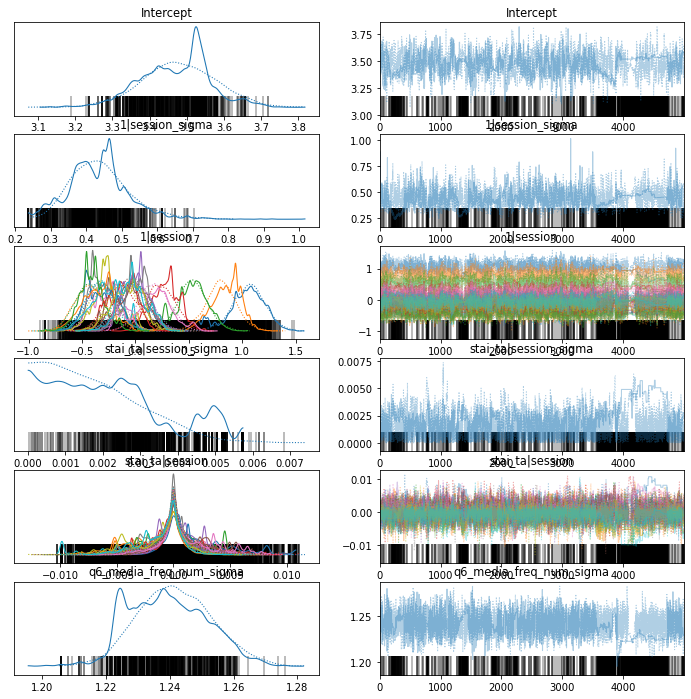

In [5]:
az.plot_trace(results)
az.summary(results)

<Figure size 432x288 with 0 Axes>

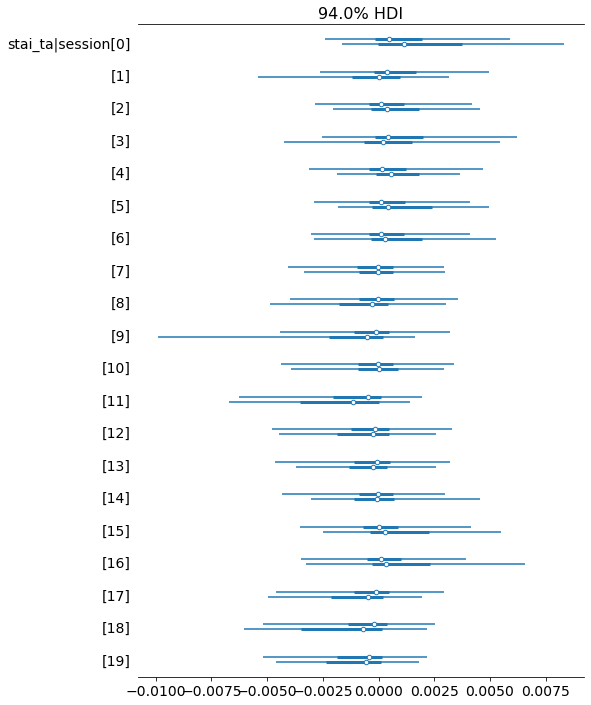

In [6]:
plt.figure()

az.plot_forest(
    results,
    var_names=["stai_ta|session"],
    figsize=(8, 12),
    combine_dims={"draw", "chain"}
);